In [80]:
import pandas as pd
# 读取用户行为数据
# 四个列名分别表示用户ID， 购买日期， 购买数量， 购买金额
columns = ['user_id', 'order_date', 'order_quantity', 'order_amount']
df = pd.read_csv('CDNOW.csv', names=columns)

In [81]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
user_id           69659 non-null int64
order_date        69659 non-null int64
order_quantity    69659 non-null int64
order_amount      69659 non-null float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB
None


In [84]:
# 将购买日期列进行数据类型转换
df['date'] = pd.to_datetime(df['order_date'], format='%Y%m%d')
df['month'] = df['date'].values.astype('datetime64[M]')

# 根据用户id进行分组
user_grouped = df.groupby('user_id').sum()
print(user_grouped.describe())

         order_date  order_quantity  order_amount
count  2.357000e+04    23570.000000  23570.000000
mean   5.902627e+07        7.122656    106.080426
std    9.460684e+07       16.983531    240.925195
min    1.997010e+07        1.000000      0.000000
25%    1.997021e+07        1.000000     19.970000
50%    1.997032e+07        3.000000     43.395000
75%    5.992125e+07        7.000000    106.475000
max    4.334408e+09     1033.000000  13990.930000


In [85]:
# 将购买日期列进行数据类型转换
df['date'] = pd.to_datetime(df['order_date'], format='%Y%m%d')
df['month'] = df['date'].values.astype('datetime64[M]')

# 根据用户id进行分组
user_grouped = df.groupby('user_id').sum()
print(user_grouped.describe())

         order_date  order_quantity  order_amount
count  2.357000e+04    23570.000000  23570.000000
mean   5.902627e+07        7.122656    106.080426
std    9.460684e+07       16.983531    240.925195
min    1.997010e+07        1.000000      0.000000
25%    1.997021e+07        1.000000     19.970000
50%    1.997032e+07        3.000000     43.395000
75%    5.992125e+07        7.000000    106.475000
max    4.334408e+09     1033.000000  13990.930000


/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['simhei'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


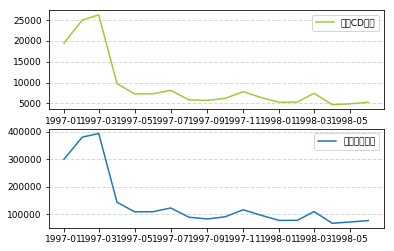

In [86]:
# 按月的纬度进行分析
# 1. 每月的CD销量
order_month = df.groupby('month')['order_quantity'].sum()
# 2. 每月的销售总额
month_total = df.groupby('month')['order_amount'].sum()

plt.rc('font', family='simhei', size=9)
plt.subplot(2, 1, 1)
plt.plot(order_month, 'yellowgreen', label='每月CD销量')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.4)
plt.legend(loc=1)
plt.subplot(2, 1, 2)
plt.plot(month_total, label='每月销售总额')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.4)
plt.legend(loc=0)
plt.show() 

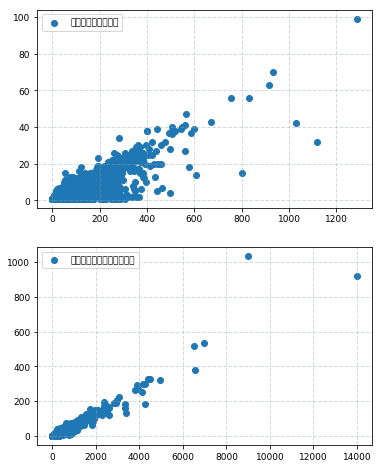

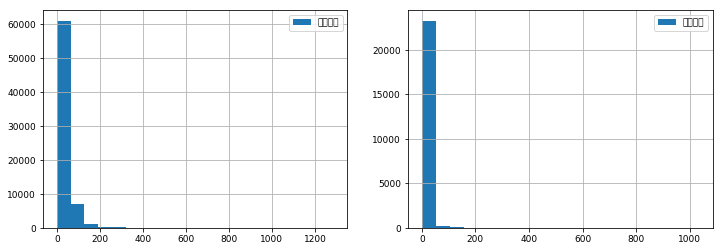

In [87]:
# 假设1 ： 早期时间段的用户有异常值
user_buy = df.groupby('user_id').sum()
plt.rc('font', family='simhei', size=9)
plt.figure(figsize=(6, 8))
plt.subplot(2, 1, 1)
plt.scatter(df['order_amount'], df['order_quantity'])
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, alpha=0.4)
plt.legend(['购买数量和消费金额'], loc=2)
plt.subplot(2, 1, 2)
plt.scatter(user_buy['order_amount'], user_buy['order_quantity'])
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, alpha=0.4)
plt.legend(['各用户购买数量和消费金额'], loc=2)
plt.show()

# 各用户消费金额和消费数量直方图
plt.rc('font', family='simhei', size=9)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df['order_amount'].hist(bins=20)
plt.legend(['消费金额'], loc=1)
plt.subplot(1, 2, 2)
df.groupby('user_id')['order_quantity'].sum().hist(bins=20)
plt.legend(['购买数量'], loc=1)
plt.show()

In [88]:
# 用户消费的时间节点
# 用户第一次消费时间
first = df.groupby('user_id').month.min().value_counts()  # Series.value_counts返回的是该Series对象中独一无二的元素的个数。
# 用户最后一次消费
last = df.groupby('user_id').month.max().value_counts()

In [89]:
# 首先将消费数据进行数据透视
pivot_counts = df.pivot_table(
    index='user_id',
    columns='month',
    values='order_date',
    aggfunc='count'
).fillna(0)
print(pivot_counts.head())

month    1997-01-01  1997-02-01     ...      1998-05-01  1998-06-01
user_id                             ...                            
1               1.0         0.0     ...             0.0         0.0
2               2.0         0.0     ...             0.0         0.0
3               1.0         0.0     ...             1.0         0.0
4               2.0         0.0     ...             0.0         0.0
5               2.0         1.0     ...             0.0         0.0

[5 rows x 18 columns]


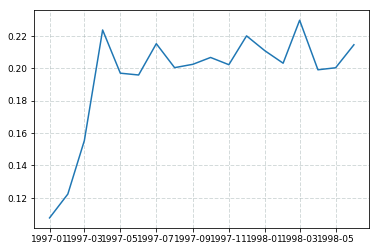

In [90]:
# 计算复购率
pivot_counts_tf = pivot_counts.applymap(lambda x: 1 if x > 1 else numpy.NaN if x == 0 else 0)  # apply() 和applymap()是DataFrame数据类型的函数，map()是Series数据类型的函数。apply()的操作对象是DataFrame的一列或者一行数据， applymap()是element-wise的，作用于每个DataFrame的每个数据。 map()也是element-wise的，对Series中的每个数据调用搜索一次函数。
repurchase_tb = pivot_counts_tf.sum() / pivot_counts_tf.count()
plt.plot(repurchase_tb)
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, alpha=0.4)
plt.show()

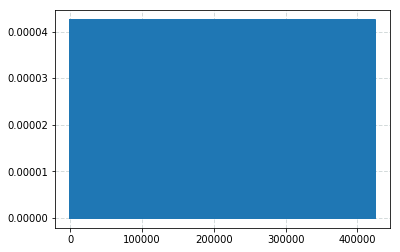

In [93]:
# 计算回购率
%matplotlib inline 
import matplotlib.pyplot as plt
pivot_amount = df.pivot_table(
    index='user_id',
    columns='month',
    values='order_amount',
    aggfunc='mean'
).fillna(0)

pivot_amount_tf = pivot_amount.applymap(lambda x: 1 if x > 0 else 0)

In [ ]:
def purchase_return(data):
    status = []
    for i in range(17):
        if data[i] == 1:
            if data[i+1] == 1:
                status.append(1)
            if data[i+1] == 0:
                status.append(0)
        else:
            status.append(numpy.NaN)
    status.append(numpy.NaN)
    return status
pivot_purchase_return = pivot_amount_tf.apply(purchase_return, axis=1)
plt.plot(pivot_purchase_return.sum() / pivot_purchase_return.count())
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, alpha=0.4)
plt.show()

KeyError: 'the label [return] is not in the [index]'

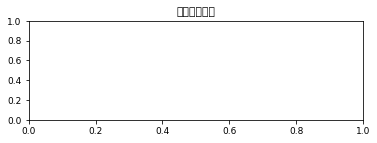

In [96]:
# 进行用户分层
def active_status(data):
    status = []
    for i in range(18):
        # 若本月没有消费
        if data[i] == 0:
            if len(status) > 0:
                if status[i-1] == 'unreg':
                    status.append('unreg')
                else:
                    status.append('unactive')
            else:
                status.append('unreg')
        # 若本月有消费
        else:
            if len(status) == 0:
                status.append('new')
            else:
                if status[i-1] == 'unactive':
                    status.append('return')
                elif status[i-1] == 'unreg':
                    status.append('new')
                else:
                    status.append('active')
    return status
pivot_purchase_status = pivot_amount_tf.apply(active_status, axis=1)

purchase_status_counts = pivot_purchase_status.\
    replace('unreg', numpy.NaN).apply(lambda x: pd.value_counts(x))

#purchase_status_counts.T.plot.area()

return_rate = purchase_status_counts.apply(lambda x: x / x.sum(), axis=1)
plt.rc('font', family='simhei', size=9)
plt.subplot(211)
plt.title('回流用户占比')
plt.plot(return_rate.loc['return'])
plt.subplot(212)
plt.title('活跃用户占比')
plt.plot(return_rate.loc['active'])
plt.show()

134 days 20:55:36.987696


(array([13450.0, 775.0, 587.0, 479.0, 592.0, 505.0, 540.0, 677.0, 650.0,
        706.0, 890.0, 1074.0, 1222.0, 1040.0, 383.0]),
 array([0.0, 36.266666666666666, 72.53333333333333, 108.8,
        145.06666666666666, 181.33333333333331, 217.6, 253.86666666666667,
        290.1333333333333, 326.4, 362.66666666666663, 398.93333333333334,
        435.2, 471.46666666666664, 507.73333333333335, 544.0]),
 <a list of 15 Patch objects>)

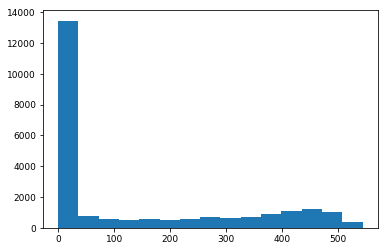

In [98]:
# 计算用户生命周期
order_date_min = df.groupby('user_id').date.min()
order_date_max = df.groupby('user_id').date.max()
print((order_date_max - order_date_min).mean())

# 生命周期分布
plt.figure(1)
plt.hist((order_date_max - order_date_min) / numpy.timedelta64(1, 'D'), bins=15)

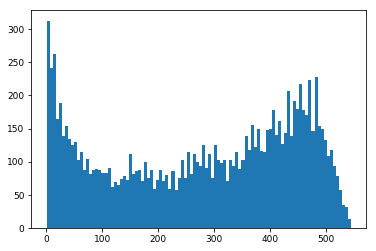

276.0448072247308


In [99]:
# 排除只消费了一次的用户
life_time = (order_date_max - order_date_min).reset_index()
life_time['life_time'] = life_time.date / numpy.timedelta64(1, 'D')
plt.figure(2)
plt.hist(life_time[life_time['life_time'] > 0].life_time, bins=100)
plt.show()

# 消费两次及以上的用户平均生命周期
print(life_time[life_time['life_time'] > 0].life_time.mean())

In [101]:
# 计算留存率
user_purchase = df[['user_id', 'order_quantity', 'order_amount', 'date']]
user_purchase_retention = pd.merge(
    left=user_purchase,
    right=order_date_min.reset_index(),
    how='inner',
    on='user_id',
    suffixes=('', '_min')
)
user_purchase_retention['order_date_diff'] = user_purchase_retention.date - user_purchase_retention.date_min

# 将日期列转换成时间数据类型
date_trans = lambda x: x / numpy.timedelta64(1, 'D')
user_purchase_retention['date_diff'] = user_purchase_retention.order_date_diff.apply(date_trans)

In [103]:
# 将时间差值分组
bin = [0, 3, 7, 15, 30, 60, 90, 180, 365]
user_purchase_retention['date_diff_bin'] = pd.cut(user_purchase_retention.date_diff, bins=bin)
# 用pivot_table数据透视， 获得的结果是用户在第一次消费之后，在后续各时间段的消费总额
pivot_retention = user_purchase_retention.pivot_table(
    index='user_id',
    columns='date_diff_bin',
    values='order_amount',
    aggfunc=sum
)

In [104]:
# 用户在后续各时间段的平均消费
print(pivot_retention.mean())

date_diff_bin
(0, 3]        35.905798
(3, 7]        36.385121
(7, 15]       42.669895
(15, 30]      45.964649
(30, 60]      50.215070
(60, 90]      48.975277
(90, 180]     67.223297
(180, 365]    91.960059
dtype: float64


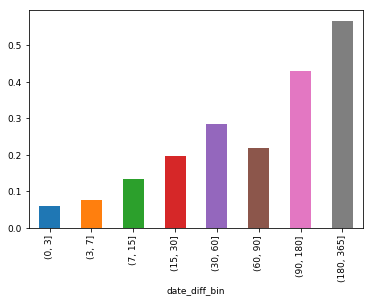

In [105]:
pivot_retention_trans = pivot_retention.fillna(0).applymap(lambda x: 1 if x > 0 else 0)
(pivot_retention_trans.sum() / pivot_retention_trans.count()).plot.bar()
plt.show()

In [107]:
# 计算用户的平均购买周期
def diff(group):
    d = abs(group.date_diff - group.date_diff.shift(-1))
    return d
last_diff = user_purchase_retention.groupby('user_id').apply(diff)
print(last_diff.head(10))
print('用户的平均购买周期:', last_diff.mean())

user_id   
1        0      NaN
2        1      0.0
         2      NaN
3        3     87.0
         4      3.0
         5    227.0
         6     10.0
         7    184.0
         8      NaN
4        9     17.0
Name: date_diff, dtype: float64
用户的平均购买周期: 68.97376814424265


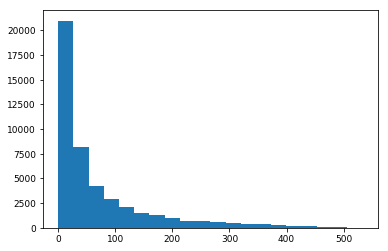

In [110]:
plt.hist(last_diff, bins=20)
plt.show()